### Programming Concepts and Practice --- ASSIGNMENT 2

In [100]:
%load_ext autoreload
%autoreload 2
from EDA import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
import matplotlib.pyplot as plt

### i). Exploratory Data Analysis

**Define dataset file name**

In [102]:
file_name = "heart_failure_clinical_records_dataset.csv"

**Call read_heart_failure_data() function:**

which take file_name as a parameter read the data as a numpy 2D array.

In [103]:
heart_failure_data = read_heart_failure_data(file_name)

float64
[[  75.    0.  582. ...    0.    4.    1.]
 [  55.    0. 7861. ...    0.    6.    1.]
 [  65.    0.  146. ...    1.    7.    1.]
 ...
 [  45.    0. 2060. ...    0.  278.    0.]
 [  45.    0. 2413. ...    1.  280.    0.]
 [  50.    0.  196. ...    1.  285.    0.]]


In [104]:
heart_failure_data.shape

(299, 13)

In [105]:
missing_values = np.isnan(heart_failure_data).any()
print(missing_values)

False


**Check categorical and numerical features**

In [106]:
check_categorical_and_numerical_features(file_name)

Column 1 (anaemia) is a categorical column with only 0 or 1 values.
Column 3 (diabetes) is a categorical column with only 0 or 1 values.
Column 5 (high_blood_pressure) is a categorical column with only 0 or 1 values.
Column 9 (sex) is a categorical column with only 0 or 1 values.
Column 10 (smoking) is a categorical column with only 0 or 1 values.
Column 12 (DEATH_EVENT) is a categorical column with only 0 or 1 values.


**Check if there any outlier in the dataset**

In [107]:
def check_ouliers(heart_failure_data):
    for i in range(heart_failure_data.shape[1]):
        column = heart_failure_data[:, i]
        lower_bound = np.percentile(column, 1)
        upper_bound = np.percentile(column, 99)
        outliers = [x for x in column if x < lower_bound or x > upper_bound]
        print(f"Outliers in column {i+1}: {outliers}")


In [108]:
check_ouliers(heart_failure_data)

Outliers in column 1: [95.0, 94.0, 95.0]
Outliers in column 2: []
Outliers in column 3: [7861.0, 23.0, 7702.0, 5882.0, 30.0]
Outliers in column 4: []
Outliers in column 5: [15.0, 65.0, 14.0, 80.0, 15.0, 70.0]
Outliers in column 6: []
Outliers in column 7: [47000.0, 621000.0, 850000.0, 25100.0, 51000.0, 742000.0]
Outliers in column 8: [9.4, 6.8, 9.0, 0.5]
Outliers in column 9: [116.0, 121.0, 146.0, 113.0, 148.0]
Outliers in column 10: []
Outliers in column 11: []
Outliers in column 12: [4.0, 6.0, 278.0, 280.0, 285.0]
Outliers in column 13: []


**We can replace the outliers as follows**

In [109]:
def replace_outliers(heart_failure_data):
    # Replace outliers with mean value
    for i in range(heart_failure_data.shape[1]):
        column = heart_failure_data[:, i]
        lower_bound = np.percentile(column, 1)
        upper_bound = np.percentile(column, 99)
        mean = np.mean(column)
        for j in range(len(column)):
            if column[j] < lower_bound or column[j] > upper_bound:
                column[j] = mean

In [110]:
replace_outliers(heart_failure_data)

**This function to find the age location measures**

In [12]:
discover_age_location_measures(heart_failure_data)

Discover Age Location and Spread Measures in Heart Failure Clinical Records Dataset

Minimum Age =  40
Maximum Age =  90
Ages Average =  60
Age Standard Deviation =  11.375894388369211
Age Variance =  129.41097313533012
--------------------------------------



**This function to get some conclusion info about our dataset**

In [111]:
discover_patients_info(heart_failure_data)

The number of smokers is  96 out of 299
Average of the smokers =  0.32 
The patients are varies between 194 men, and 105 women
The number of smokers men is 92


**Explore dataset statistical information: mean, median, std, var, skew, kurtosis**

In [113]:
explore_continous_var_statistical_info(file_name)


 mean, median, std, var, skew, kurtosis for Column 0 (age) are:

mean : 60.83
median : 60.0
std : 11.87
var : 141.01
min : 40.0
max : 95.0
skewness : 0.42
kurtosis : -0.2

 mean, median, std, var, skew, kurtosis for Column 2 (creatinine_phosphokinase) are:

mean : 581.84
median : 250.0
std : 968.66
var : 938309.88
min : 23.0
max : 7861.0
skewness : 4.44
kurtosis : 24.71

 mean, median, std, var, skew, kurtosis for Column 4 (ejection_fraction) are:

mean : 38.08
median : 38.0
std : 11.82
var : 139.6
min : 14.0
max : 80.0
skewness : 0.55
kurtosis : 0.02

 mean, median, std, var, skew, kurtosis for Column 6 (platelets) are:

mean : 263358.03
median : 262000.0
std : 97640.55
var : 9533676546.27
min : 25100.0
max : 850000.0
skewness : 1.45
kurtosis : 6.09

 mean, median, std, var, skew, kurtosis for Column 7 (serum_creatinine) are:

mean : 1.39
median : 1.1
std : 1.03
var : 1.07
min : 0.5
max : 9.4
skewness : 4.43
kurtosis : 25.38

 mean, median, std, var, skew, kurtosis for Column 8 (seru

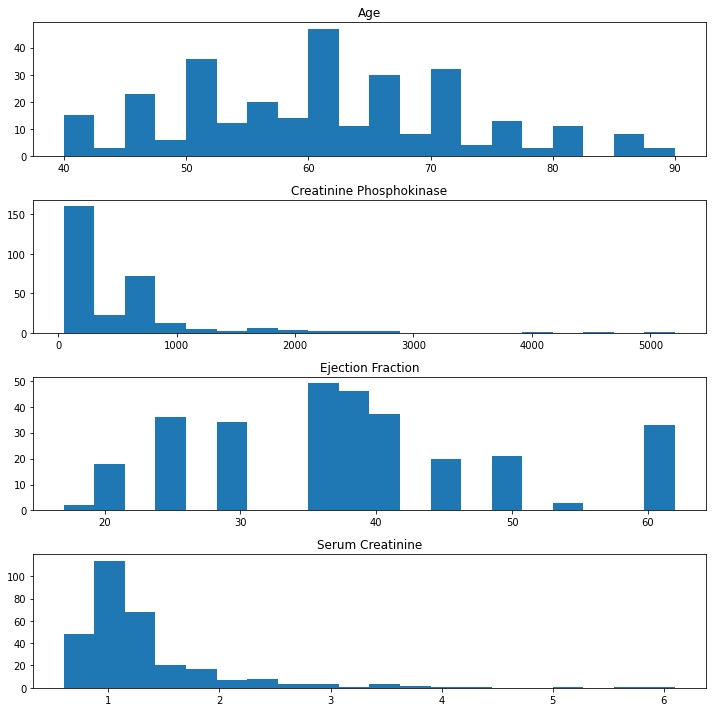

In [15]:
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

axs[0].hist(heart_failure_data[:, 0], bins=20)
axs[0].set_title('Age')
axs[1].hist(heart_failure_data[:, 2], bins=20)
axs[1].set_title('Creatinine Phosphokinase')
axs[2].hist(heart_failure_data[:, 4], bins=20)
axs[2].set_title('Ejection Fraction')
axs[3].hist(heart_failure_data[:, 7], bins=20)
axs[3].set_title('Serum Creatinine')

plt.tight_layout()
plt.show()


In [114]:
def frequency_of_death_by_sex(heart_failure_data):
    try:
        data = heart_failure_data
        # Create a dictionary to store the frequencies of the different values in the 'sex' and 'DEATH_EVENT' columns
        frequencies = {0: {0: 0, 1: 0}, 1: {0: 0, 1: 0}}

        # Count the frequencies of the different values
        for row in data:
            frequencies[int(row[12])][int(row[9])] += 1
        # Create the grouped bar plot
        bar_width = 0.35
        bar_l = np.arange(len(frequencies))
        bar_r = [x + bar_width for x in bar_l]
        fig, ax = plt.subplots()
        ax.bar(bar_l, frequencies[0].values(), width=bar_width, label='Death Event = 0')
        ax.bar(bar_r, frequencies[1].values(), width=bar_width, label='Death Event = 1')
        ax.set_xlabel('Sex')
        ax.set_ylabel('Frequency')
        ax.set_title('Frequency of Death Event by Sex')
        ax.set_xticks([r + bar_width / 2 for r in range(len(frequencies))])
        ax.set_xticklabels(["Women", "Men"])
        ax.legend()
        plt.show()

    except Exception as e:
        print(f"An error {e} has been raised")

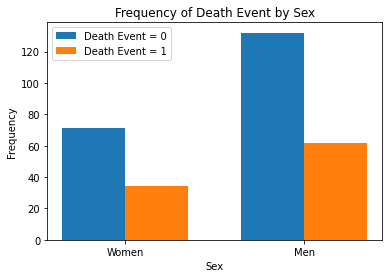

In [115]:
frequency_of_death_by_sex(heart_failure_data)

In [116]:
# 6- study distribution of some columns
def show_anaemia_diabetes_death_distributions(heart_failure_data):
    try:
        data = heart_failure_data
        # Get the data for the anaemia column
        anaemia = data[:, 1]
        # Find the unique values and their frequencies
        anaemia_values, anaemia_counts = np.unique(anaemia, return_counts=True)
        # Plot the pie chart
        plt.pie(anaemia_counts, labels=anaemia_values, autopct='%1.1f%%')
        plt.title('Anaemia Distribution')
        plt.show()
        # Get the data for the diabetes column
        diabetes = data[:, 3]
        # Find the unique values and their frequencies
        diabetes_values, diabetes_counts = np.unique(diabetes, return_counts=True)
        # Plot the pie chart
        plt.pie(diabetes_counts, labels=diabetes_values, autopct='%1.1f%%')
        plt.title('Diabetes Distribution')
        plt.show()
        # Get the data for the DEATH_EVENT column
        death_event = data[:, 12]
        # Find the unique values and their frequencies
        death_event_values, death_event_counts = np.unique(death_event, return_counts=True)
        # Plot the pie chart without the 'nan' values
        plt.pie(death_event_counts, labels=death_event_values, autopct='%1.1f%%')
        plt.title('DEATH_EVENT Distribution')
        plt.show()

    except Exception as e:
        print(f"An error {e} has been raised")

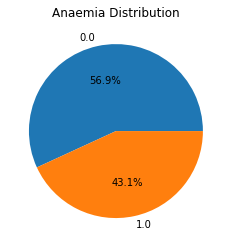

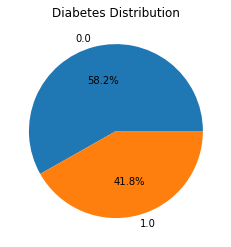

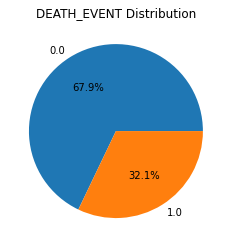

In [117]:
show_anaemia_diabetes_death_distributions(heart_failure_data)

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy import stats
from scipy.stats import mannwhitneyu, chi2_contingency
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE

## ii). Classification I

In [120]:
data_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [121]:
data_df.shape

(299, 13)

In [122]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [123]:
data_df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [124]:
data_df.isna().any() 

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In order to make our code easy to maintain and while we need to retrain the same machine learning algorithms, I will define a function to do the required training

In [126]:
# Split the data into features and target
X = data_df.drop(["DEATH_EVENT"], axis=1)
y = data_df["DEATH_EVENT"]

In [127]:
# Evaluation function: find the Confusion metrics, Accuracy, Recall, F1 Score, and Precision for the passed model result
def evaluation(y_test, y_pred):
    # Print Accuracy, Recall, F1 Score, and Precision metrics.
    print('Evaluation Metrics:')
    print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))
    
    # Print Confusion Matrix
    print('\nConfusion Matrix:')
    print(' TP,  FP, FN, TN')
    print(confusion_matrix(y_test, y_pred).ravel())
    # Confusion metrics
    cm = metrics.confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
    plt.title(all_sample_title, size = 15);

In [128]:
# Fit machine learning algorithms

In [129]:
# 1- Fit the Naive Bayes model
def fit_naive_bayes_model(X_train, X_test, y_train):
    try:
        print("Fit the Naive Bayes model")
        gnb_model = GaussianNB()
        gnb_model.fit(X_train, y_train)
        # Predict on the test set
        y_pred = gnb_model.predict(X_test)
        return gnb_model, y_pred

    except Exception as e:
        print(f"An error {e} has been raised")

In [130]:
# 2- Fit the Logistic Regression model
def fit_logistic_regression_model(X_train, X_test, y_train):
    try:
        print("Fit the Logistic Regression model")
        log_reg_model = LogisticRegression(C=100, max_iter=150, class_weight='balanced')
        log_reg_model.fit(X_train, y_train)
        # Predict on the test s
        y_pred = log_reg_model.predict(X_test)
        return log_reg_model, y_pred

    except Exception as e:
        print(f"An error {e} has been raised")

In [131]:
# 3- Fit the Support Vector Machine model
def fit_svc_model(X_train, X_test, y_train):
    try:
        svc_model = SVC(kernel='rbf', C=1, gamma='auto')
        svc_model.fit(X_train, y_train)
        # Predict on the test set
        y_pred = svc_model.predict(X_test)
        return svc_model, y_pred

    except Exception as e:
        print(f"An error {e} has been raised")

In [132]:
# 4- Fit the Random Forest classifier model
def random_forest_classifier_model(X_train, X_test, y_train):
    try:
        print("Fit the Random Forest classifier model")
        rfc_model = RandomForestClassifier(n_estimators=100)
        rfc_model.fit(X_train, y_train)
        # Predict on the test set
        y_pred = rfc_model.predict(X_test)
        return rfc_model, y_pred

    except Exception as e:
        print(f"An error {e} has been raised")

In [133]:
# 5- Fit the K-Nearest Neighbour model
def fit_knn_model(X_train, X_test, y_train):
    try:
        print("Fit the K-Nearest Neighbour model")
        knn_model = KNeighborsClassifier(n_neighbors=3)
        knn_model.fit(X_train, y_train)
        # Predict on the test set
        y_pred = knn_model.predict(X_test)
        return knn_model, y_pred

    except Exception as e:
        print(f"An error {e} has been raised")

In [134]:
# 6- Fit the Multi-Layer Perceptron Neural Network model
def fit_multi_layer_perceptron_nn(X_train, X_test, y_train):
    try:
        # Fit the Multi-Layer Perceptron Neural Network model
        mlp_model = MLPClassifier(hidden_layer_sizes=(50, 100, 50), activation='relu', solver='adam', alpha=0.001,
                                  learning_rate='adaptive', max_iter=200, random_state=42)
        mlp_model.fit(X_train, y_train)
        # Predict on the test set
        y_pred = mlp_model.predict(X_test)
        return mlp_model, y_pred

    except Exception as e:
        print(f"An error {e} has been raised")

### Split the dataset on training and testing sets.

In [135]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [136]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
101,75.0,0,582,0,45,1,263358.03,1.18,137,1,0,87
69,65.0,0,113,1,25,0,497000.00,1.83,135,1,0,67
31,85.0,0,23,0,45,0,360000.00,3.00,132,1,0,28
172,70.0,1,171,0,60,1,176000.00,1.10,145,1,1,146
148,75.0,1,582,0,30,0,225000.00,1.83,134,1,0,113


In [138]:
X_train.shape

(200, 12)

In [140]:
y_train.shape

(200,)

In [142]:
X_test.shape

(99, 12)

In [143]:
y_test.shape

(99,)

### Fit the Naive Bayes model

In [144]:
nb_model, nb_predict = fit_naive_bayes_model(X_train, X_test, y_train)

Fit the Naive Bayes model


In [145]:
nb_predict[:10]#Let's see the first 10 predictions

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

### Model Evaluation

Evaluation Metrics:
Accuracy: 0.7575757575757576
Recall: 0.47619047619047616
F1 Score: 0.6249999999999999
Precision: 0.9090909090909091

Confusion Matrix:
 TP,  FP, FN, TN
[55  2 22 20]


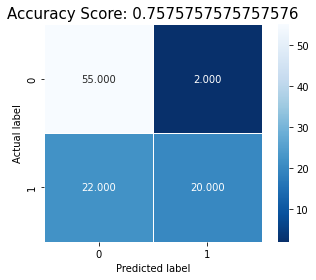

In [146]:
evaluation(y_test, nb_predict)

### Fit the Logistic Regression model

In [147]:
log_reg_model, log_reg_predict = fit_logistic_regression_model(X_train, X_test, y_train)

Fit the Logistic Regression model


In [148]:
log_reg_predict[:10]#Let's see the first 10 predictions

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [149]:
### Model Evaluation

Evaluation Metrics:
Accuracy: 0.7777777777777778
Recall: 0.7142857142857143
F1 Score: 0.7317073170731706
Precision: 0.75

Confusion Matrix:
 TP,  FP, FN, TN
[47 10 12 30]


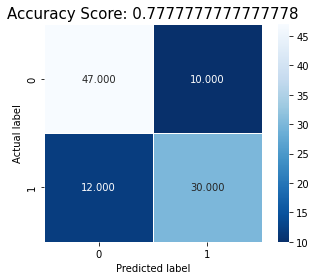

In [150]:
evaluation(y_test, log_reg_predict)

### Fit the Support Vector Machine model

In [151]:
svc_model, svc_predict = fit_svc_model(X_train, X_test, y_train)

In [152]:
svc_predict[:10]#Let's see the first 10 predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Model Evaluation

Evaluation Metrics:
Accuracy: 0.5757575757575758
Recall: 0.0
F1 Score: 0.0
Precision: 0.0

Confusion Matrix:
 TP,  FP, FN, TN
[57  0 42  0]


c:\users\tota\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


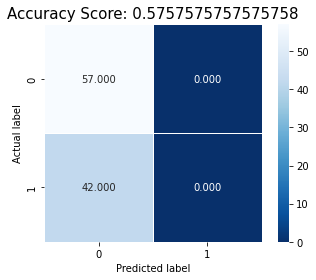

In [153]:
evaluation(y_test, svc_predict)

### Fit the Random Forest classifier model

In [154]:
rfc_model, rfc_predict = random_forest_classifier_model(X_train, X_test, y_train)

Fit the Random Forest classifier model


In [155]:
rfc_predict[:10]#Let's see the first 10 predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

### Model Evaluation

Evaluation Metrics:
Accuracy: 0.7575757575757576
Recall: 0.5238095238095238
F1 Score: 0.6470588235294118
Precision: 0.8461538461538461

Confusion Matrix:
 TP,  FP, FN, TN
[53  4 20 22]


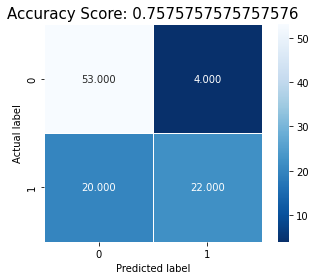

In [156]:
evaluation(y_test, rfc_predict)

### Fit the K-Nearest Neighbour model

In [157]:
knn_model, knn_predict = fit_knn_model(X_train, X_test, y_train)

Fit the K-Nearest Neighbour model


In [158]:
knn_predict[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Model Evaluation

Evaluation Metrics:
Accuracy: 0.5656565656565656
Recall: 0.16666666666666666
F1 Score: 0.2456140350877193
Precision: 0.4666666666666667

Confusion Matrix:
 TP,  FP, FN, TN
[49  8 35  7]


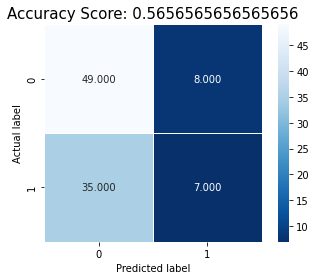

In [159]:
evaluation(y_test, knn_predict)

### Fit the Multi-Layer Perceptron Neural Network model

In [160]:
mlp_model, mlp_predict = fit_multi_layer_perceptron_nn(X_train, X_test, y_train)

In [161]:
mlp_predict[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### Model Evaluation

Evaluation Metrics:
Accuracy: 0.42424242424242425
Recall: 1.0
F1 Score: 0.5957446808510638
Precision: 0.42424242424242425

Confusion Matrix:
 TP,  FP, FN, TN
[ 0 57  0 42]


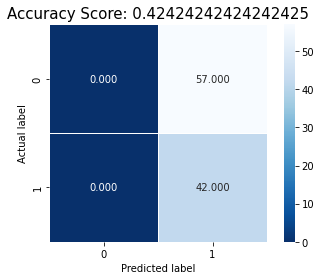

In [162]:
evaluation(y_test, mlp_predict)

## iii). Classification II

#### class imbalance problem

In [163]:
def producing_the_plot_of_the_target(data_df):
    try:
        # Count the number of occurrences of each class in the target variable
        class_counts = data_df['DEATH_EVENT'].value_counts()
        # Plot the class distribution
        class_counts.plot(kind='bar', rot=0)
        plt.xlabel('Class')
        plt.ylabel('Count')
        plt.title('Class Distribution')
        plt.show()

    except Exception as e:
        print(f"An error {e} has been raised")

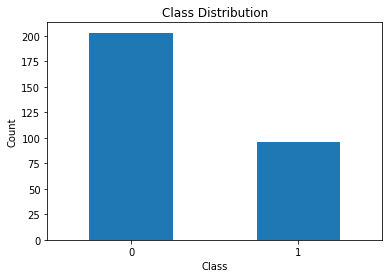

In [164]:
producing_the_plot_of_the_target(data_df)

### Random under-sampling with imblearn

In [165]:
from imblearn.under_sampling import RandomUnderSampler

In [166]:
from collections import Counter

In [167]:
# Split the data into features and target
X_new = data_df.drop(["DEATH_EVENT"], axis=1)
y_new = data_df["DEATH_EVENT"]

In [168]:
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_new, y_new)

print('original dataset shape:', Counter(y_new))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 203, 1: 96})
Resample dataset shape Counter({0: 96, 1: 96})


In [169]:
y_rus.shape

(192,)

In [170]:
x_rus.shape

(192, 12)

In [171]:
x_rus.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,40.0,0,244,0,45,1,275000.0,0.90,140,0,0,174
1,45.0,0,582,0,38,1,422000.0,0.80,137,0,0,245
2,70.0,1,171,0,60,1,176000.0,1.10,145,1,1,146
3,42.0,0,102,1,40,0,237000.0,1.20,140,1,0,74
4,73.0,1,231,1,30,0,160000.0,1.18,142,1,1,180


Repeat the code starting from split the dataset into training and test sets
Then retrain all the previous models and compare the results

In [172]:
# Split the data into training and testing sets
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X, y, test_size=0.33, random_state=42)

### Random over-sampling with imblearn

In [174]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)


# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X_new, y_new)

print('Original dataset shape', Counter(y_new))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 203, 1: 96})
Resample dataset shape Counter({1: 203, 0: 203})


In [175]:
x_ros.shape

(406, 12)

In [176]:
x_ros.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [177]:
y_ros.shape

(406,)

Repeat the code starting from split the dataset into training and test sets
Then retrain all the previous models and compare the results

In [178]:
# Split the data into training and testing sets
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X, y, test_size=0.33, random_state=42)

### IV). Feature Selection

#### Using Mann-Whitney test & Chi-Square test

In [179]:
# Using Mann-Whitney test for numerical features & Chi-Square test for categorical features
def features_test(data_df):
    try:
        p_values = {}
        # Split the data into two groups based on the target class
        survived = data_df[data_df.DEATH_EVENT == 0]
        dead = data_df[data_df.DEATH_EVENT == 1]
        numerical = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium',
                              'time',
                              'serum_creatinine']
        categorical = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

        for column in numerical:
                stat, p_value = mannwhitneyu(survived[column], dead[column])
                p_values[column] = p_value
        for column in categorical:
                contingency_table = pd.crosstab(data_df[column], data_df['DEATH_EVENT'])
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                p_values[column] = p_value
        sorted_p_values = dict(sorted(p_values.items(), key=lambda item: item[1]))
        return sorted_p_values
    except Exception as e:
        print(f"An error {e} has been raised")

In [180]:
features_test(data_df)

{'time': 6.85219665413428e-21,
 'serum_creatinine': 1.5809979011834038e-10,
 'anaemia': 1.5809979011834038e-10,
 'diabetes': 1.5809979011834038e-10,
 'high_blood_pressure': 1.5809979011834038e-10,
 'sex': 1.5809979011834038e-10,
 'smoking': 1.5809979011834038e-10,
 'ejection_fraction': 7.368249168477738e-07,
 'age': 0.0001667518011391951,
 'serum_sodium': 0.00029275574637774727,
 'platelets': 0.4255585098046608,
 'creatinine_phosphokinase': 0.6840400261440358}

### feature importance graph (from Random Forest Classifier in III above)

In [181]:
# feature importance graph (from Random Forest Classifier in III above)
def plot_features_importance_graph(data_df):
    try:
        # Create a feature importance graph
        # Create Random Forest Classifier and fit the model
        X = data_df.drop(['DEATH_EVENT'], axis=1)
        y = data_df['DEATH_EVENT']
        clf = RandomForestClassifier(random_state=0)
        clf.fit(X, y)
        importance = clf.feature_importances_
        feature_importance = dict(zip(data_df.drop(['DEATH_EVENT'], axis=1).columns, importance))
        feature_importance = {k: v for k, v in
                              sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)}
        plt.bar(feature_importance.keys(), feature_importance.values())
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.xticks(rotation=90)
        plt.show()
        sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))
        return sorted_feature_importance

    except Exception as e:
        print(f"An error {e} has been raised")

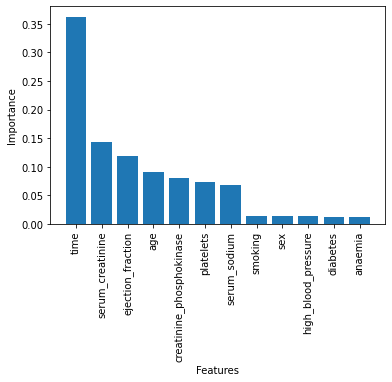

In [182]:
sorted_feature_importance = plot_features_importance_graph(data_df)

In [183]:
selected_data_df = data_df[['time', 'serum_creatinine', 'ejection_fraction', 'age', 'sex', 'serum_sodium','high_blood_pressure', 'DEATH_EVENT']]
selected_data_df.head()

,time,serum_creatinine,ejection_fraction,age,sex,serum_sodium,high_blood_pressure,DEATH_EVENT
0,4,1.9,20,75.0,1,130,1,1
1,6,1.1,38,55.0,1,136,0,1
2,7,1.3,20,65.0,1,129,0,1
3,7,1.9,20,50.0,1,137,0,1
4,8,2.7,20,65.0,0,116,0,1


In [184]:
selected_data_df.shape

(299, 8)

### V). Classification III

##### Split the dataset on training and testing sets.

In [185]:
# Split the data into features and target
X_selected = selected_data_df.drop(["DEATH_EVENT"], axis=1)
y_selected = selected_data_df["DEATH_EVENT"]

In [186]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected, test_size=0.33, random_state=42)

#### Naïve Bayes

In [187]:
nb_model_selected, nb_predict_selected = fit_naive_bayes_model(X_train_selected, X_test_selected, y_train_selected)

Fit the Naive Bayes model


In [188]:
nb_predict_selected[:10]#Let's see the first 10 predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

* Model Evaluation

Evaluation Metrics:
Accuracy: 0.7272727272727273
Recall: 0.4523809523809524
F1 Score: 0.5846153846153845
Precision: 0.8260869565217391

Confusion Matrix:
 TP,  FP, FN, TN
[53  4 23 19]


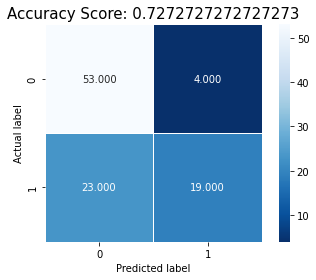

In [189]:
evaluation(y_test_selected, nb_predict_selected)

#### Logistic Regression model

In [191]:
log_reg_model_selected, log_reg_predict_selected = fit_logistic_regression_model(X_train_selected, X_test_selected, y_train_selected)

Fit the Logistic Regression model


In [192]:
log_reg_predict_selected[:10]#Let's see the first 10 predictions

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

* Model Evaluation

Evaluation Metrics:
Accuracy: 0.797979797979798
Recall: 0.7142857142857143
F1 Score: 0.7500000000000001
Precision: 0.7894736842105263

Confusion Matrix:
 TP,  FP, FN, TN
[49  8 12 30]


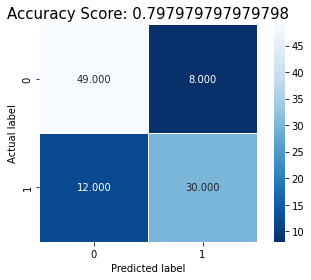

In [194]:
evaluation(y_test_selected, log_reg_predict_selected)

#### Support Vector Machine model

In [195]:
svc_model_selected, svc_predict_selected = fit_svc_model(X_train_selected, X_test_selected, y_train_selected)

In [196]:
svc_predict_selected[:10]#Let's see the first 10 predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

* Model Evaluation

Evaluation Metrics:
Accuracy: 0.5757575757575758
Recall: 0.0
F1 Score: 0.0
Precision: 0.0

Confusion Matrix:
 TP,  FP, FN, TN
[57  0 42  0]


c:\users\tota\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


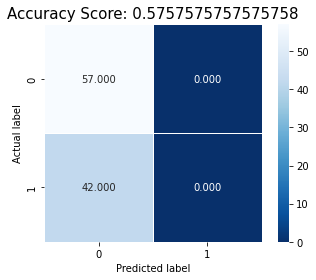

In [198]:
evaluation(y_test_selected, svc_predict_selected)

#### Random Forest classifier model

In [199]:
rfc_model_selected, rfc_predict_selected = random_forest_classifier_model(X_train_selected, X_test_selected, y_train_selected)

Fit the Random Forest classifier model


In [200]:
rfc_predict_selected[:10]#Let's see the first 10 predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

* Model Evaluation

Evaluation Metrics:
Accuracy: 0.7676767676767676
Recall: 0.5476190476190477
F1 Score: 0.6666666666666667
Precision: 0.8518518518518519

Confusion Matrix:
 TP,  FP, FN, TN
[53  4 19 23]


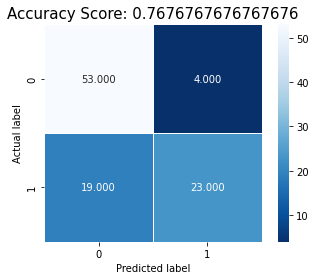

In [201]:
evaluation(y_test_selected, rfc_predict_selected)

#### K-Nearest Neighbour model

In [202]:
knn_model_selected, knn_predict_selected = fit_knn_model(X_train_selected, X_test_selected, y_train_selected)

Fit the K-Nearest Neighbour model


In [203]:
knn_predict_selected[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

Evaluation Metrics:
Accuracy: 0.7575757575757576
Recall: 0.5476190476190477
F1 Score: 0.6571428571428571
Precision: 0.8214285714285714

Confusion Matrix:
 TP,  FP, FN, TN
[52  5 19 23]


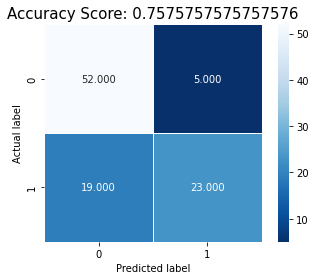

In [204]:
evaluation(y_test_selected, knn_predict_selected)